### Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

### Loading Dataset

https://www.kaggle.com/datasets/faa/wildlife-strikes

In [5]:
typeSpecification = {"Aircraft Model": str, "Engine Model": str, "Engine3 Position": str, "Engine1 Position":str}
dataFrame = pd.read_csv('birdDatabase.csv', dtype=typeSpecification)
print(dataFrame.describe(include="all"))

            Record ID  Incident Year  Incident Month   Incident Day  \
count   174104.000000  174104.000000   174104.000000  174104.000000   
unique            NaN            NaN             NaN            NaN   
top               NaN            NaN             NaN            NaN   
freq              NaN            NaN             NaN            NaN   
mean    241204.036915    2006.036392        7.171840      15.712264   
std      94013.682213       6.747708        2.790152       8.799405   
min       1000.000000    1990.000000        1.000000       1.000000   
25%     205411.750000    2001.000000        5.000000       8.000000   
50%     249102.500000    2007.000000        8.000000      16.000000   
75%     322592.250000    2012.000000        9.000000      23.000000   
max     367445.000000    2015.000000       12.000000      31.000000   

       Operator ID Operator Aircraft Aircraft Type Aircraft Make  \
count       174104   174104   174104        133074        131051   
unique     

In [3]:
dataFrame

,Record ID,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Aircraft Type,Aircraft Make,Aircraft Model,...,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
0,127128,1990,1,1,DAL,DELTA AIR LINES,B-757-200,A,148,26,...,0,0,0,0,1,1,0,0,0,0
1,129779,1990,1,1,HAL,HAWAIIAN AIR,DC-9,A,583,90,...,0,0,0,0,0,0,0,0,1,0
2,129780,1990,1,2,UNK,UNKNOWN,UNKNOWN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,2258,1990,1,3,MIL,MILITARY,A-10A,A,345,NaN,...,0,0,0,0,0,0,0,0,0,0
4,2257,1990,1,3,MIL,MILITARY,F-16,A,561,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174099,366091,2015,9,30,SWA,SOUTHWEST AIRLINES,B-737-700,A,148,42,...,0,0,0,0,0,0,0,0,0,0
174100,365902,2015,9,30,SWA,SOUTHWEST AIRLINES,B-737-700,A,148,42,...,0,0,0,0,0,0,0,0,0,0
174101,365903,2015,9,30,BUS,BUSINESS,CITATIONJET,A,226,49,...,1,1,0,0,0,0,0,0,0,0
174102,366046,2015,9,30,QXE,HORIZON AIR,DHC8 DASH 8,A,303,10,...,1,0,0,0,0,0,0,0,0,0


### Column Names Reference

In [4]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174104 entries, 0 to 174103
Data columns (total 66 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Record ID             174104 non-null  int64  
 1   Incident Year         174104 non-null  int64  
 2   Incident Month        174104 non-null  int64  
 3   Incident Day          174104 non-null  int64  
 4   Operator ID           174104 non-null  object 
 5   Operator              174104 non-null  object 
 6   Aircraft              174104 non-null  object 
 7   Aircraft Type         133074 non-null  object 
 8   Aircraft Make         131051 non-null  object 
 9   Aircraft Model        122439 non-null  object 
 10  Aircraft Mass         127320 non-null  float64
 11  Engine Make           123434 non-null  float64
 12  Engine Model          121988 non-null  object 
 13  Engines               127342 non-null  float64
 14  Engine Type           127282 non-null  object 
 15  

In [32]:
empty = dataFrame.isnull().sum()
empty

Record ID         0
Incident Year     0
Incident Month    0
Incident Day      0
Operator ID       0
                 ..
Tail Damage       0
Lights Strike     0
Lights Damage     0
Other Strike      0
Other Damage      0
Length: 66, dtype: int64

### Incidents Over Time

In [22]:
timeOfYear = dataFrame[['Incident Day', 'Incident Month', 'Incident Year']]
timeOfYear

,Incident Day,Incident Month,Incident Year
0,1,1,1990
1,1,1,1990
2,2,1,1990
3,3,1,1990
4,3,1,1990
...,...,...,...
174099,30,9,2015
174100,30,9,2015
174101,30,9,2015
174102,30,9,2015


In [24]:
timeOfYear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174104 entries, 0 to 174103
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   Incident Day    174104 non-null  int64
 1   Incident Month  174104 non-null  int64
 2   Incident Year   174104 non-null  int64
dtypes: int64(3)
memory usage: 4.0 MB


In [25]:
timeOfYear.isnull().sum()

Incident Day      0
Incident Month    0
Incident Year     0
dtype: int64

No null vales for incidents by time.

In [6]:
byYear=dataFrame.iloc[:, 1].value_counts()
byYear

2014    13976
2013    11666
2012    11264
2011    10363
2015    10148
2010     9934
2009     9848
2008     7993
2007     7993
2006     7750
2005     7591
2004     7122
2002     6659
2003     6485
2000     6351
2001     6216
1999     5385
1998     4131
1997     3651
1996     3215
1995     2989
1994     2938
1993     2849
1992     2816
1991     2672
1990     2099
Name: Incident Year, dtype: int64

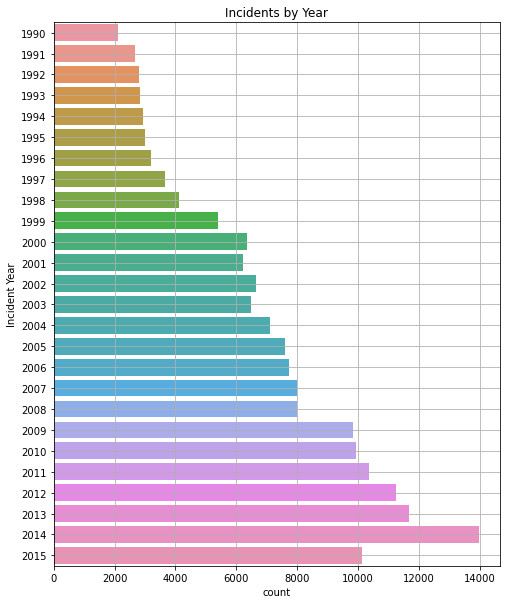

In [7]:
plt.figure(figsize=(8,10))

sns.countplot(y="Incident Year", data=dataFrame)

plt.title("Incidents by Year")

plt.grid()

plt.show()

Incidents have been increasing over the years

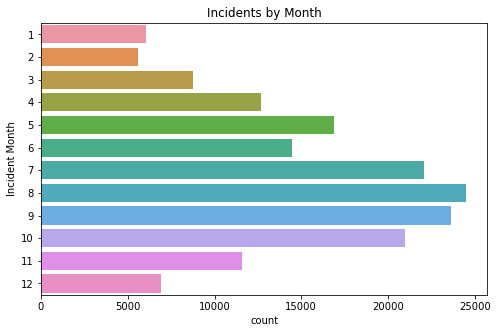

In [8]:
plt.figure(figsize=(8,5))

sns.countplot(y="Incident Month", data=dataFrame)

plt.title("Incidents by Month")
plt.show()

The worst months for birds are August and September.

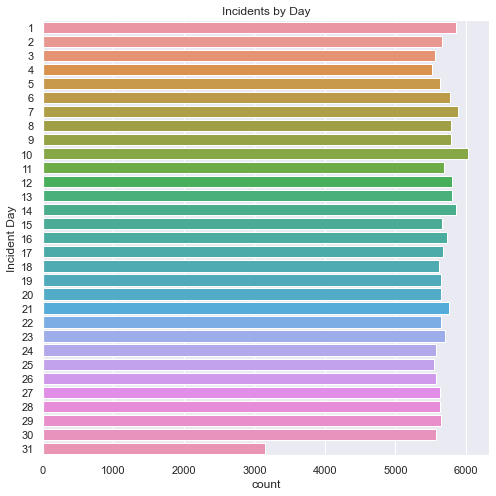

In [30]:
plt.figure(figsize=(8,8))

sns.countplot(y="Incident Day", data=dataFrame)

plt.title("Incidents by Day")
plt.show()

The day of the week doesn't seem to have much affect on bird injuries. But late summer/early fall is a much more likely indicator. 

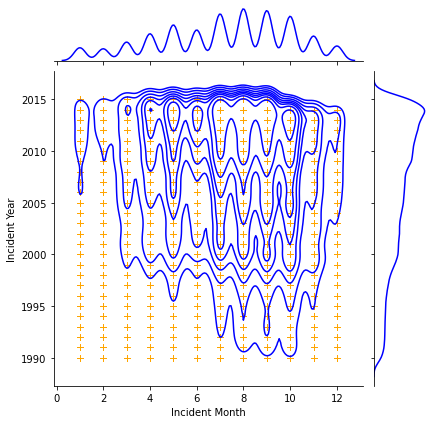

In [9]:
g = sns.jointplot(x="Incident Month", y="Incident Year", data=dataFrame, kind="kde", color="b")
g.plot_joint(plt.scatter, c="orange", s=40, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("Incident Month", "Incident Year") 
plt.show()

### Exploring other factors

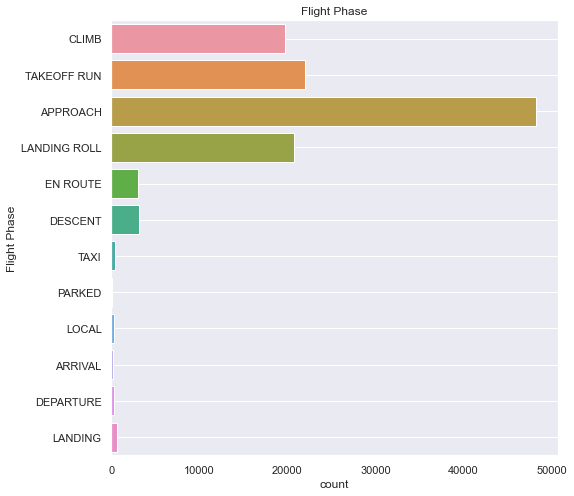

In [42]:
flightPhase=dataFrame.iloc[:,24]

plt.figure(figsize=(8,8))
sns.countplot(y=flightPhase, data=dataFrame)

plt.title("Flight Phase")
plt.grid()

plt.show()

Most impacts occur when the plane is making its approach to land.

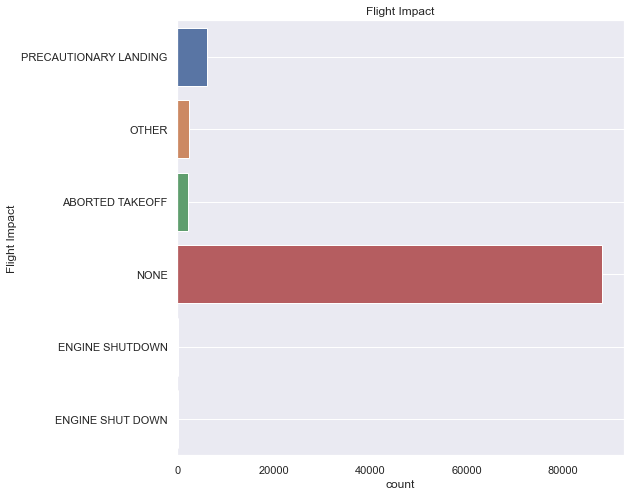

In [44]:
flightImpact=dataFrame.iloc[:,33]

plt.figure(figsize=(8,8))
sns.countplot(y=flightImpact, data=dataFrame)

plt.title("Flight Impact")
plt.grid()

plt.show()

Airplane and bird collisions do not seem to affect the course of the flight but only rarely.

### Incidents by State

In [10]:
byState=dataFrame.iloc[:, 21].value_counts()
byState

TX    14854
CA    13187
FL    10604
NY     9043
IL     7465
      ...  
AB       47
MB       14
NL        7
SK        6
NS        5
Name: State, Length: 62, dtype: int64

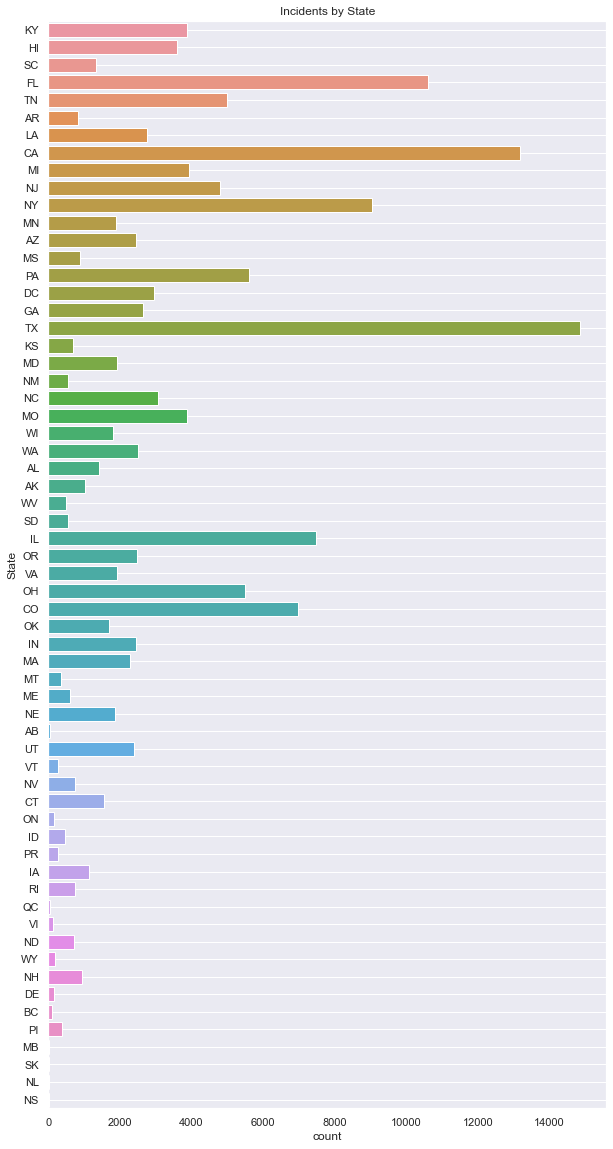

In [46]:
plt.figure(figsize=(10,20))
sns.countplot(y="State", data=dataFrame)

plt.title("Incidents by State")
plt.grid()

plt.show()

Bigger states see the most impacts.

In [1]:
import re
import numpy as np

In [6]:
attributes = (list(dataFrame))
attributes

['Record ID',
 'Incident Year',
 'Incident Month',
 'Incident Day',
 'Operator ID',
 'Operator',
 'Aircraft',
 'Aircraft Type',
 'Aircraft Make',
 'Aircraft Model',
 'Aircraft Mass',
 'Engine Make',
 'Engine Model',
 'Engines',
 'Engine Type',
 'Engine1 Position',
 'Engine2 Position',
 'Engine3 Position',
 'Engine4 Position',
 'Airport ID',
 'Airport',
 'State',
 'FAA Region',
 'Warning Issued',
 'Flight Phase',
 'Visibility',
 'Precipitation',
 'Height',
 'Speed',
 'Distance',
 'Species ID',
 'Species Name',
 'Species Quantity',
 'Flight Impact',
 'Fatalities',
 'Injuries',
 'Aircraft Damage',
 'Radome Strike',
 'Radome Damage',
 'Windshield Strike',
 'Windshield Damage',
 'Nose Strike',
 'Nose Damage',
 'Engine1 Strike',
 'Engine1 Damage',
 'Engine2 Strike',
 'Engine2 Damage',
 'Engine3 Strike',
 'Engine3 Damage',
 'Engine4 Strike',
 'Engine4 Damage',
 'Engine Ingested',
 'Propeller Strike',
 'Propeller Damage',
 'Wing or Rotor Strike',
 'Wing or Rotor Damage',
 'Fuselage Strike',
 '

In [7]:
damage = []
strikes = []
dam = ".*Damage$"
stri = ".*Strike$"
for i in attributes:
    if (re.match(dam, i)):
        damage.append(i)
    elif (re.match(stri, i)):
        strikes.append(i)

In [8]:
damage

['Aircraft Damage',
 'Radome Damage',
 'Windshield Damage',
 'Nose Damage',
 'Engine1 Damage',
 'Engine2 Damage',
 'Engine3 Damage',
 'Engine4 Damage',
 'Propeller Damage',
 'Wing or Rotor Damage',
 'Fuselage Damage',
 'Landing Gear Damage',
 'Tail Damage',
 'Lights Damage',
 'Other Damage']

In [9]:
damage = damage [1:]
damage

['Radome Damage',
 'Windshield Damage',
 'Nose Damage',
 'Engine1 Damage',
 'Engine2 Damage',
 'Engine3 Damage',
 'Engine4 Damage',
 'Propeller Damage',
 'Wing or Rotor Damage',
 'Fuselage Damage',
 'Landing Gear Damage',
 'Tail Damage',
 'Lights Damage',
 'Other Damage']

In [10]:
strikes

['Radome Strike',
 'Windshield Strike',
 'Nose Strike',
 'Engine1 Strike',
 'Engine2 Strike',
 'Engine3 Strike',
 'Engine4 Strike',
 'Propeller Strike',
 'Wing or Rotor Strike',
 'Fuselage Strike',
 'Landing Gear Strike',
 'Tail Strike',
 'Lights Strike',
 'Other Strike']

In [11]:
damage_y = []
for i in damage:
    damage_y.append(dataFrame[i].sum())

<BarContainer object of 14 artists>

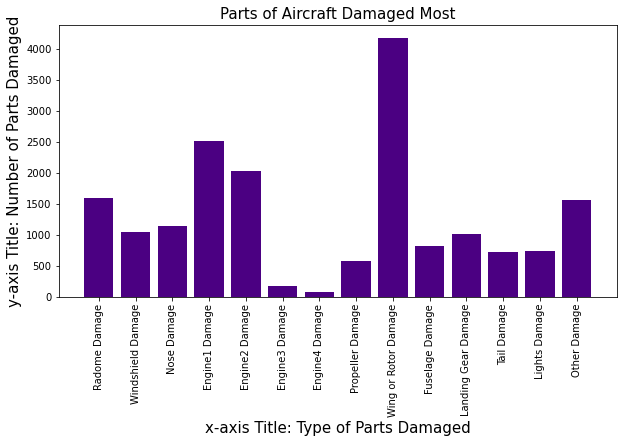

In [12]:
plt.rcParams["figure.figsize"] = (10, 5)
plt.bar(damage, damage_y)
plt.xlabel ("x-axis Title: Type of Parts Damaged",fontsize = 15)
plt.ylabel ("y-axis Title: Number of Parts Damaged",fontsize = 15)
plt. title("Parts of Aircraft Damaged Most",fontsize = 15)
plt.xticks(rotation = "vertical")
c = "indigo"
plt.bar(damage, damage_y, color = c)

In [13]:
strikes_y = []
for i in strikes:
    strikes_y.append(dataFrame[i].sum())

<BarContainer object of 14 artists>

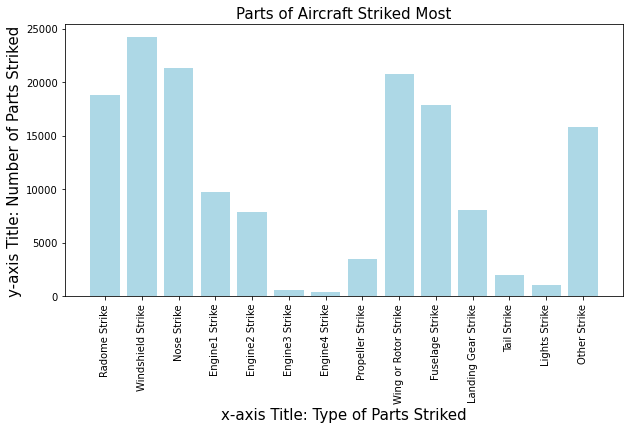

In [14]:
plt.rcParams["figure.figsize"] = (10, 5)
plt.bar(strikes, strikes_y)
plt.xlabel ("x-axis Title: Type of Parts Striked",fontsize = 15)
plt.ylabel ("y-axis Title: Number of Parts Striked",fontsize = 15)
plt. title("Parts of Aircraft Striked Most",fontsize = 15)
plt.xticks(rotation = "vertical")
c = "lightblue"
plt.bar(strikes, strikes_y, color = c)

In [15]:
dataFrame ["Airport"].value_counts().head(10)

UNKNOWN                        18570
DENVER INTL AIRPORT             5434
DALLAS/FORT WORTH INTL ARPT     4828
CHICAGO O'HARE INTL ARPT        3963
JOHN F KENNEDY INTL             3287
MEMPHIS INTL                    2834
SACRAMENTO INTL                 2607
SALT LAKE CITY INTL             2315
ORLANDO INTL                    2142
LA GUARDIA ARPT                 2059
Name: Airport, dtype: int64

In [16]:
airport_counts = dataFrame ["Airport"].value_counts()
airports = airport_counts.index
counts = airport_counts.to_numpy()

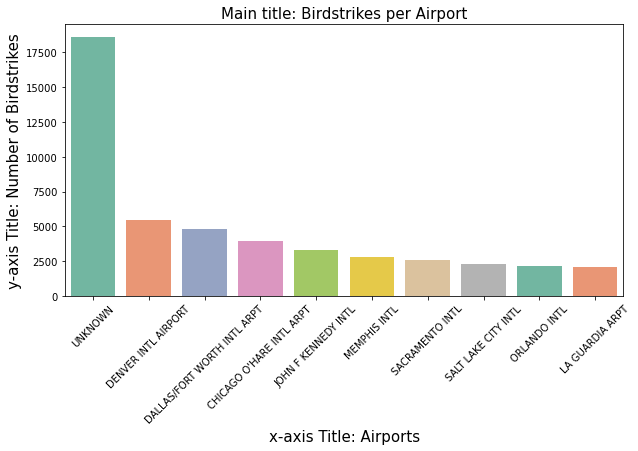

In [17]:
plt.xticks(rotation=45)

plt.xlabel ("x-axis Title: Airports",fontsize = 15)
plt.ylabel ("y-axis Title: Number of Birdstrikes",fontsize = 15)
plt.title ("Main title: Birdstrikes per Airport", fontsize = 15)
barplot = sns.barplot(x = airports[:10], y=counts[:10], palette = "Set2")